## PSSM matrix for nucleotide sequences

Load sequences from a FASTA file

Perform Multiple Sequence Alignment (MSA)

Build a count matrix

Calculate a frequency matrix

Generate the PSSM (log-odds format)

In [59]:
from Bio import SeqIO
import math
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio import AlignIO
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
from Bio import SeqIO

def main():
    """Main function to parse a FASTA file and print extracted sequences."""
    # Prompt the user to enter the file path
    file_path = input("Enter the path to the FASTA file: ")

    # Read and parse the FASTA file
    sequences = []
    with open(file_path, "r") as file:
        for record in SeqIO.parse(file, "fasta"):
            sequences.append(str(record.seq))

    # Print the extracted sequences
    print("\nExtracted Sequences:")
    for i, seq in enumerate(sequences, start=1):
        print(f"Sequence {i}: {seq}")

if __name__ == "__main__":
    main()



Extracted Sequences:
Sequence 1: ATCCAGCT
Sequence 2: GGGCAACT
Sequence 3: ATGGATCT
Sequence 4: AAGCAACC
Sequence 5: TTGGAACT
Sequence 6: ATGCCATT
Sequence 7: ATGGCACT


In [61]:
import os
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio import AlignIO

def run_clustal_omega(input_file: str, output_file: str, clustalo_exe: str) -> None:
    """
    Executes Clustal Omega to perform multiple sequence alignment.

    Parameters:
        input_file (str): Path to the input FASTA file.
        output_file (str): Path to the output aligned FASTA file.
        clustalo_exe (str): Path to the Clustal Omega executable.
    
    Raises:
        FileNotFoundError: If the Clustal Omega executable is not found.
    """
    if not os.path.isfile(clustalo_exe):
        raise FileNotFoundError(f"Clustal Omega not found at: {clustalo_exe}")

    clustalomega_cline = ClustalOmegaCommandline(
        cmd=clustalo_exe,
        infile=input_file,
        outfile=output_file,
        verbose=True,
        auto=True,
        force=True
    )

    print("Running Clustal Omega...")
    stdout, stderr = clustalomega_cline()
    print("Done.\nSTDOUT:", stdout)
    print("STDERR:", stderr)

def main():
    # Define paths (update these paths as needed)
    clustalo_exe = r"C:\Users\Shrushti\Downloads\clustal-omega-1.2.2-win64\clustal-omega-1.2.2-win64\clustalo.exe"
    input_file = r"D:\My_folder\Code_practice\ML_model\Prot_structure_proj\Position_Specific_Scoring_Matrices\seq.fasta"
    output_file = r"D:\My_folder\Code_practice\ML_model\Prot_structure_proj\Position_Specific_Scoring_Matrices\aligned.fasta"

    # Run alignment
    run_clustal_omega(input_file, output_file, clustalo_exe)

    # Read and print the alignment
    alignment = AlignIO.read(output_file, "fasta")
    print("\nAlignment:\n", alignment)

if __name__ == "__main__":
    main()


Running Clustal Omega...
Done.
STDOUT: Using 12 threads
Read 7 sequences (type: DNA) from D:\My_folder\Code_practice\ML_model\Prot_structure_proj\Position_Specific_Scoring_Matrices\seq.fasta
not more sequences (7) than cluster-size (100), turn off mBed
Setting options automatically based on input sequence characteristics (might overwrite some of your options).
Auto settings: Enabling mBed.
Auto settings: Setting iteration to 1.
Using 6 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 7 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress: 0 % (0 out of 27)
Ktuple-distance calculation progress: 11 % (3 out of 27)
Ktuple-distance calculation progress: 22 % (6 out of 27)
Ktuple-distance calculation progress: 29 % (8 out of 27)
Ktuple-distance calculation progress: 33 % (9 out of 27)
Ktuple-distance calculation progress: 55 % (15 out of 27)
Ktuple-distance calculation progress done. CPU time: 0.00u 00:00:00.00 Elapsed

In [62]:
from Bio import AlignIO
from typing import List, Dict

# Global variable to hold the count matrix
count_matrix = None

def create_count_matrix(alignment_file: str) -> List[Dict[str, int]]:
    """
    Creates a count matrix from a DNA multiple sequence alignment.

    Parameters:
        alignment_file (str): Path to the aligned FASTA file.

    Returns:
        List[Dict[str, int]]: A list of dictionaries containing base counts at each column position.
    """
    # Read the alignment using Biopython
    alignment = AlignIO.read(alignment_file, "fasta")
    print("\nAlignment:\n", alignment)

    alphabet = 'AGCT'
    count_matrix_local = []

    for i in range(alignment.get_alignment_length()):
        col_counts = {}

        for record in alignment:
            residue = record.seq[i].upper()
            if residue in alphabet:
                col_counts[residue] = col_counts.get(residue, 0) + 1

        count_matrix_local.append(col_counts)

    return count_matrix_local

# Path to your aligned FASTA file
alignment_file = r"D:\My_folder\Code_practice\ML_model\Prot_structure_proj\Position_Specific_Scoring_Matrices\aligned.fasta"

# Assign to global variable
count_matrix = create_count_matrix(alignment_file)

# Optional: print it for verification
print("Count Matrix:")
for i, col in enumerate(count_matrix, start=1):
    print(f"Position {i}: {col}")



Alignment:
 Alignment with 7 rows and 8 columns
ATCCAGCT Rosalind_1
GGGCAACT Rosalind_2
ATGGATCT Rosalind_3
AAGCAACC Rosalind_4
TTGGAACT Rosalind_5
ATGCCATT Rosalind_6
ATGGCACT Rosalind_7
Count Matrix:
Position 1: {'A': 5, 'G': 1, 'T': 1}
Position 2: {'T': 5, 'G': 1, 'A': 1}
Position 3: {'C': 1, 'G': 6}
Position 4: {'C': 4, 'G': 3}
Position 5: {'A': 5, 'C': 2}
Position 6: {'G': 1, 'A': 5, 'T': 1}
Position 7: {'C': 6, 'T': 1}
Position 8: {'T': 6, 'C': 1}


In [63]:
# Convert to Frequency Matrix
frequency_matrix = []

for col in count_matrix:
    total = sum(col.values())  # Total number of residues at this position
    print(total)
    
    freqs = {
        residue: count / total
        for residue, count in col.items()
    }

    frequency_matrix.append(freqs)

# Print frequency matrix in readable form
print("Frequency Matrix")
for i, freqs in enumerate(frequency_matrix, start=1):
    print(f"Position {i} :", freqs)


7
7
7
7
7
7
7
7
Frequency Matrix
Position 1 : {'A': 0.7142857142857143, 'G': 0.14285714285714285, 'T': 0.14285714285714285}
Position 2 : {'T': 0.7142857142857143, 'G': 0.14285714285714285, 'A': 0.14285714285714285}
Position 3 : {'C': 0.14285714285714285, 'G': 0.8571428571428571}
Position 4 : {'C': 0.5714285714285714, 'G': 0.42857142857142855}
Position 5 : {'A': 0.7142857142857143, 'C': 0.2857142857142857}
Position 6 : {'G': 0.14285714285714285, 'A': 0.7142857142857143, 'T': 0.14285714285714285}
Position 7 : {'C': 0.8571428571428571, 'T': 0.14285714285714285}
Position 8 : {'T': 0.8571428571428571, 'C': 0.14285714285714285}


In [64]:
# Generate PSSM Matrix (log-odds using uniform background)

pseudocount = 1
alphabet = 'AGCT'
pssm_matrix = []

for col in count_matrix:
    total = sum(col.values())
    position_scores = {}

    for base in alphabet:
        count = col.get(base, 0)  # use 0 if base is missing
        freq = (count + pseudocount) / (total + pseudocount * len(alphabet))
        score = math.log2(freq / (1 / len(alphabet)))  # log-odds
        position_scores[base] = round(score, 2)

    pssm_matrix.append(position_scores)

print(pssm_matrix)


[{'A': 1.13, 'G': -0.46, 'C': -1.46, 'T': -0.46}, {'A': -0.46, 'G': -0.46, 'C': -1.46, 'T': 1.13}, {'A': -1.46, 'G': 1.35, 'C': -0.46, 'T': -1.46}, {'A': -1.46, 'G': 0.54, 'C': 0.86, 'T': -1.46}, {'A': 1.13, 'G': -1.46, 'C': 0.13, 'T': -1.46}, {'A': 1.13, 'G': -0.46, 'C': -1.46, 'T': -0.46}, {'A': -1.46, 'G': -1.46, 'C': 1.35, 'T': -0.46}, {'A': -1.46, 'G': -1.46, 'C': -0.46, 'T': 1.35}]


In [65]:
# Print PSSM matrix
print("PSSM Matrix (log-odds)")
for i, col in enumerate(pssm_matrix):
    print(f"Position {i+1}: {col}")

PSSM Matrix (log-odds)
Position 1: {'A': 1.13, 'G': -0.46, 'C': -1.46, 'T': -0.46}
Position 2: {'A': -0.46, 'G': -0.46, 'C': -1.46, 'T': 1.13}
Position 3: {'A': -1.46, 'G': 1.35, 'C': -0.46, 'T': -1.46}
Position 4: {'A': -1.46, 'G': 0.54, 'C': 0.86, 'T': -1.46}
Position 5: {'A': 1.13, 'G': -1.46, 'C': 0.13, 'T': -1.46}
Position 6: {'A': 1.13, 'G': -0.46, 'C': -1.46, 'T': -0.46}
Position 7: {'A': -1.46, 'G': -1.46, 'C': 1.35, 'T': -0.46}
Position 8: {'A': -1.46, 'G': -1.46, 'C': -0.46, 'T': 1.35}


In [66]:
## PSSM in the dataframe format which can be further saved to csv and used in ML feature calculations

pssm = pd.DataFrame(pssm_matrix)
pssm

,A,G,C,T
0,1.13,-0.46,-1.46,-0.46
1,-0.46,-0.46,-1.46,1.13
2,-1.46,1.35,-0.46,-1.46
3,-1.46,0.54,0.86,-1.46
4,1.13,-1.46,0.13,-1.46
5,1.13,-0.46,-1.46,-0.46
6,-1.46,-1.46,1.35,-0.46
7,-1.46,-1.46,-0.46,1.35


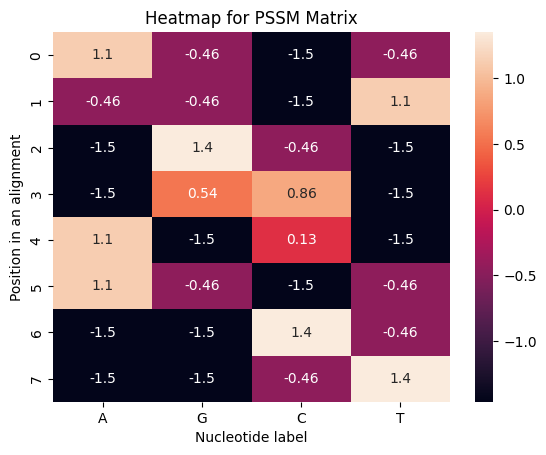

In [67]:
## Visualizing the matrix using heatmap

pssm_df = pd.DataFrame(pssm_matrix)

sns.heatmap(pssm_df,annot=True)
plt.title("Heatmap for PSSM Matrix")
plt.xlabel("Nucleotide label")
plt.ylabel("Position in an alignment")
plt.show()

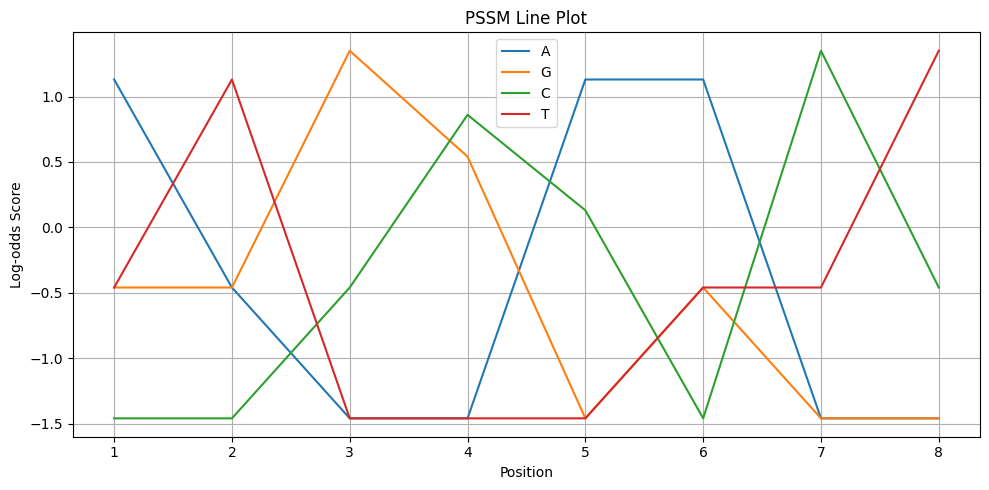

In [68]:
## Visualizing scores

plt.figure(figsize=(10, 5))

for base in alphabet:
    scores = [col.get(base, 0) for col in pssm_matrix]
    plt.plot(range(1, len(scores)+1), scores, label=base)


plt.title("PSSM Line Plot")
plt.xlabel("Position")
plt.ylabel("Log-odds Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
